#  performance

In [40]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["performance.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df_performance=df
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std,scenario
0,hpccdgemm,16,1,1,25.30693,1.653881,none
1,hpccdgemm,16,1,1,30.87712,0.722985,cpumem
2,hpccdgemm,16,4,4,33.25831,0.892758,cpumem-scale
3,hpccdgemm,16,4,16,37.01919,0.527568,cpumem-granularity
4,hpccdgemm,16,4,4,32.89374,0.966805,cpumem-scale-notg
5,hpccdgemm,16,4,16,36.94405,0.862015,cpumem-granularity-notg


   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std  \
0  hpccdgemm      16       1         1         25.30693        1.653881   
1  hpccdgemm      16       1         1         30.87712        0.722985   
2  hpccdgemm      16       4         4         33.25831        0.892758   
3  hpccdgemm      16       4        16         37.01919        0.527568   
4  hpccdgemm      16       4         4         32.89374        0.966805   
5  hpccdgemm      16       4        16         36.94405        0.862015   

                  scenario  
0                     none  
1                   cpumem  
2             cpumem-scale  
3       cpumem-granularity  
4        cpumem-scale-notg  
5  cpumem-granularity-notg  


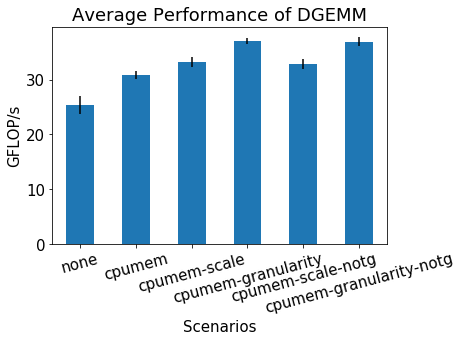

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams.update({'font.size': 15}) # 改变所有字体大小，改变其他性质类似

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='scenario', 
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Average Performance of DGEMM",
                 legend=None)
    plt.xticks(rotation=15) 
    plt.xlabel("Scenarios")
    plt.ylabel("GFLOP/s")
    
plt.savefig('performance.pdf',bbox_inches='tight',pad_inches=0.1)

#  time slot

In [111]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["timesum.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)

In [112]:
df_time1=df
df_time1

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum,scenario
0,hpccdgemm,16,2098.0,15214.0,0.0,17673.716917,none
1,hpccdgemm,16,1507.0,11805.0,0.0,13684.176558,cpumem
2,hpccdgemm,16,1405.0,11305.0,1.0,13084.038859,cpumem-scale
3,hpccdgemm,16,1235.0,9985.0,0.0,11631.109424,cpumem-granularity
4,hpccdgemm,16,1432.0,11391.0,0.0,13206.929683,cpumem-scale-notg
5,hpccdgemm,16,1274.0,10198.0,1.0,11877.470054,cpumem-granularity-notg


In [113]:
df_time1

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum,scenario
0,hpccdgemm,16,2098.0,15214.0,0.0,17673.716917,none
1,hpccdgemm,16,1507.0,11805.0,0.0,13684.176558,cpumem
2,hpccdgemm,16,1405.0,11305.0,1.0,13084.038859,cpumem-scale
3,hpccdgemm,16,1235.0,9985.0,0.0,11631.109424,cpumem-granularity
4,hpccdgemm,16,1432.0,11391.0,0.0,13206.929683,cpumem-scale-notg
5,hpccdgemm,16,1274.0,10198.0,1.0,11877.470054,cpumem-granularity-notg


In [114]:
(df_time1['duration_sum']-df_time1['duration_sum'][0])/df_time1['duration_sum'][0]

0    0.000000
1   -0.225733
2   -0.259689
3   -0.341898
4   -0.252736
5   -0.327959
Name: duration_sum, dtype: float64

In [115]:
(df_time1['duration_sum']-df_time1['duration_sum'][1])/df_time1['duration_sum'][1]

0    0.291544
1    0.000000
2   -0.043856
3   -0.150032
4   -0.034876
5   -0.132029
Name: duration_sum, dtype: float64

In [116]:
df_time1

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum,scenario
0,hpccdgemm,16,2098.0,15214.0,0.0,17673.716917,none
1,hpccdgemm,16,1507.0,11805.0,0.0,13684.176558,cpumem
2,hpccdgemm,16,1405.0,11305.0,1.0,13084.038859,cpumem-scale
3,hpccdgemm,16,1235.0,9985.0,0.0,11631.109424,cpumem-granularity
4,hpccdgemm,16,1432.0,11391.0,0.0,13206.929683,cpumem-scale-notg
5,hpccdgemm,16,1274.0,10198.0,1.0,11877.470054,cpumem-granularity-notg


In [117]:
df_time1 = df_time1.reindex([0,1,4,5,2,3])
df_time1

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum,scenario
0,hpccdgemm,16,2098.0,15214.0,0.0,17673.716917,none
1,hpccdgemm,16,1507.0,11805.0,0.0,13684.176558,cpumem
4,hpccdgemm,16,1432.0,11391.0,0.0,13206.929683,cpumem-scale-notg
5,hpccdgemm,16,1274.0,10198.0,1.0,11877.470054,cpumem-granularity-notg
2,hpccdgemm,16,1405.0,11305.0,1.0,13084.038859,cpumem-scale
3,hpccdgemm,16,1235.0,9985.0,0.0,11631.109424,cpumem-granularity


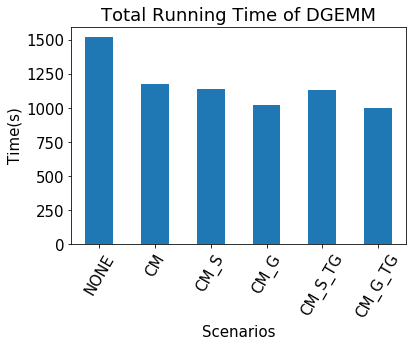

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

labels = ['NONE','CM',
          'CM_S','CM_G','CM_S_TG','CM_G_TG']
tickvalues = [0,1,2,3,4,5]

for model_name in df_time1['benchmark'].unique():
    df_bench = df_time1[(df_time1['benchmark']==model_name)] # everybenchmark
    df_bench['run_sum'] = df_bench['run_sum']/10 #avg

    # plot grouped bar chart
    df_bench.plot(x='scenario',
                  y='run_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Total Running Time of DGEMM",
                 legend=None)
    plt.xticks(ticks = tickvalues ,labels = labels, rotation = 60) 
    plt.xlabel("Scenarios")
    plt.ylabel("Time(s)")
    
plt.savefig('timesum.pdf',bbox_inches='tight',pad_inches=0.1)

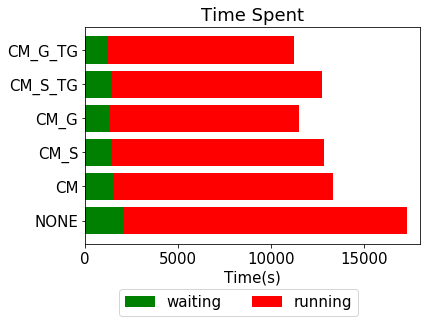

In [119]:
import numpy as np
import matplotlib.pyplot as plt

color=['green','red','blue']

y2 = df_time1['init_sum']
y3 = df_time1['run_sum']
y4 = df_time1['final_sum']

# labels = df_time1['scenario']

labels = ['NONE','CM',
          'CM_S','CM_G','CM_S_TG','CM_G_TG']
tickvalues = [0,1,2,3,4,5]

plt.barh(labels, y2, color='green', label='waiting')
plt.barh(labels, y3, left=y2, color='red', label='running')
# plt.barh(labels, y4, left=y2+y3, color='blue', label='completing')

plt.xlim((0,18000))
plt.title("Time Spent")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0.1, -0.33], ncol=3)                                                         #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
# plt.show()
plt.savefig('exp1-appsum.pdf',bbox_inches='tight',pad_inches=0.1)
# 

In [105]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["time.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)

In [106]:
df_time1=df
df_time1

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std,scenario
0,hpccdgemm,16,4,16,0 days 00:02:07.400000,0 days 00:03:53.305893624,1019.8,19.249935,0.1,0.3,1187.747005,216.380642,cpumem-granularity-notg
1,hpccdgemm,16,4,4,0 days 00:02:23.200000,0 days 00:04:37.150789282,1139.1,65.048367,0.0,0.0,1320.692968,339.691470,cpumem-scale-notg
2,hpccdgemm,16,4,4,0 days 00:02:20.500000,0 days 00:04:32.263567155,1130.5,69.292496,0.1,0.3,1308.403886,340.937407,cpumem-scale
3,hpccdgemm,16,4,16,0 days 00:02:03.500000,0 days 00:03:52.500860213,998.5,16.883424,0.0,0.0,1163.110942,216.895124,cpumem-granularity
4,hpccdgemm,16,1,1,0 days 00:03:29.800000,0 days 00:06:52.179038768,1521.4,107.625462,0.0,0.0,1767.371692,465.846563,none
5,hpccdgemm,16,1,1,0 days 00:02:30.700000,0 days 00:04:54.410954279,1180.5,18.429596,0.0,0.0,1368.417656,297.670782,cpumem


In [107]:
df_time1 = df_time1.reindex([4,5,1,0,2,3])
df_time1

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std,scenario
4,hpccdgemm,16,1,1,0 days 00:03:29.800000,0 days 00:06:52.179038768,1521.4,107.625462,0.0,0.0,1767.371692,465.846563,none
5,hpccdgemm,16,1,1,0 days 00:02:30.700000,0 days 00:04:54.410954279,1180.5,18.429596,0.0,0.0,1368.417656,297.670782,cpumem
1,hpccdgemm,16,4,4,0 days 00:02:23.200000,0 days 00:04:37.150789282,1139.1,65.048367,0.0,0.0,1320.692968,339.691470,cpumem-scale-notg
0,hpccdgemm,16,4,16,0 days 00:02:07.400000,0 days 00:03:53.305893624,1019.8,19.249935,0.1,0.3,1187.747005,216.380642,cpumem-granularity-notg
2,hpccdgemm,16,4,4,0 days 00:02:20.500000,0 days 00:04:32.263567155,1130.5,69.292496,0.1,0.3,1308.403886,340.937407,cpumem-scale
3,hpccdgemm,16,4,16,0 days 00:02:03.500000,0 days 00:03:52.500860213,998.5,16.883424,0.0,0.0,1163.110942,216.895124,cpumem-granularity


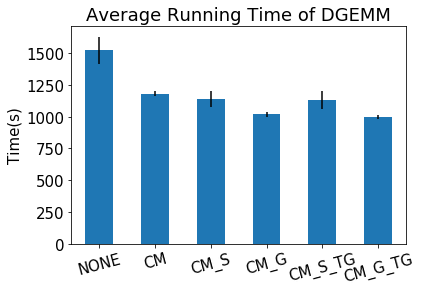

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

labels = ['NONE','CM',
          'CM_S','CM_G','CM_S_TG','CM_G_TG']
tickvalues = [0,1,2,3,4,5]

for model_name in df_time1['benchmark'].unique():
    df_bench = df_time1[(df_time1['benchmark']==model_name)] # everybenchmark
    df_bench['run_mean'] = df_bench['run_mean'] #avg

    # plot grouped bar chart
    df_bench.plot(x='scenario',
                  y='run_mean',
                  yerr='run_std',
                    kind='bar',
                    stacked=False,
                    title=f"Average Running Time of DGEMM",
                 legend=None)
    plt.xticks(ticks = tickvalues ,labels = labels, rotation = 15) 
    plt.xlabel(None)
    plt.ylabel("Time(s)")
    
plt.savefig('exp1-performance.pdf',bbox_inches='tight',pad_inches=0.1)